<a href="https://colab.research.google.com/github/Vey27/Deep-Learning-and-Computer-Vision/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Perceptron PyTorch**

In [37]:
!pip3 install torch


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

In [39]:
n_pts = 500
centers = [[-0.5, 0.5], [0.5, -0.5]]
X, y = datasets.make_circles(n_samples=n_pts, random_state=123, noise=0.1, factor=0.2)
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(500,1))



In [40]:
def scatter_plot():
  plt.scatter(X[y==0,0], X[y==0,1])
  plt.scatter(X[y==1,0], X[y==1,1])

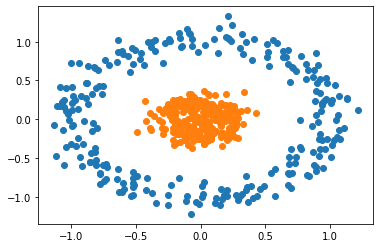

In [41]:
scatter_plot()

In [42]:
class Model(nn.Module):
  def __init__(self, input_size, H1, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, H1)
    self.linear2 = nn.Linear(H1, output_size)
    def forward(self, x):
      x = torch.sigmoid(self.linear(X))
      X = torch.sigmoid(self.linear)
      return x
    def predict (self, x):
      pred = self.forward(x)
      if pred >- 0.5:
        return 1
      else:
        return 0

In [43]:
torch.manual_seed(2)
model = Model(2, 4, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683],
        [-0.0813, -0.5717]], requires_grad=True), Parameter containing:
tensor([ 0.1614, -0.6260,  0.0929,  0.0470], requires_grad=True), Parameter containing:
tensor([[-0.1099,  0.4088,  0.0334,  0.2073]], requires_grad=True), Parameter containing:
tensor([0.2116], requires_grad=True)]


In [44]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01) #Learning rate

In [49]:
epochs = 1000
losses = []
for i in range(epochs):
  y_pred = model.forward(x_data)
  loss = criterion(y_pred,y_data)
  print('epoch:', i, 'loss', loss.item())
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


NotImplementedError: ignored

ValueError: ignored

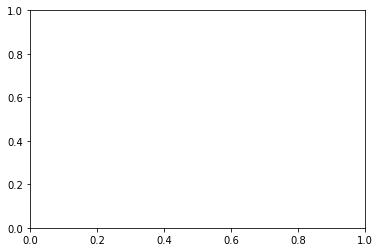

In [50]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

In [51]:
plot_fit('Trained Model')

NameError: ignored

# To be continue 